# Estimación del Área de un Lago mediante el Método de Monte Carlo

En primer lugar hemos hecho un preprocesmiento de la imgaen en la que la hemos ajustado a un tamaño A4 y hemos tomado estas medidas.

1. **Medidas tomadas**:  
   - La imagen fue ajustada a tamaño A4 con dimensiones de $  29.7 \, \text{cm} \times 21 \, \text{cm}  $.  
   - La escala se midió en Photoshop, resultando en $ 2.97 \, \text{cm} $ para representar 50 m de la imagen.  

<br>

2. **Con los datos podemos medir las siguientes magnitudes**: 

- **prop**: Proporción de agua en la imagen, estimada como (resultado de aplicar Montecarlo):
  $$
  \text{prop} = \frac{\text{puntos\_agua}}{\text{puntos\_totales}}
  $$

- **A**: Área total del folio (en m²), calculada como:
  $$
  A = (29.7 \times 21) \times \left( \frac{50}{2.97} \right)^2
  $$

- **A_lago**: Área estimada del lago (en m²), obtenida como:
  $$
  A_{\text{lago}} = A \times \text{prop}
  $$



In [9]:
A = (29.7 * 21) * (50/2.97) ** 2

In [2]:
#importamos la image preprocesada y comprobamos que las dimensiones sean las adecuadas

from random import random
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("imagen_A4.png").convert("L")
height, width = img.size

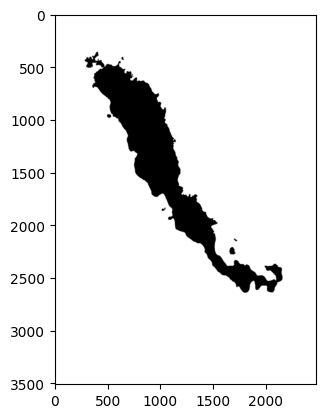

In [3]:
plt.imshow(img, interpolation='bilinear', cmap='gray')

In [4]:
from random import randint

#genera un punto aleatorio que perteneza a la imagen
def get_random_point():
    return (randint(0, height - 1), randint(0, width - 1))

In [5]:
n_puntos = 1_000

In [8]:
puntos_agua = []
puntos_tierra = []

#El umbral marca en que punto empezamos a considerar un punto agua, no lo ponemos a 255 puesto que esto puede dar lugar a error.
umbral = 50

pixeles_agua = 0

for i in range(n_puntos):
    punto = get_random_point()
    pixel = img.getpixel(punto)
    
    #caso agua
    if pixel < umbral: 
        pixeles_agua += 1
        puntos_agua.append(punto)
    #caso tierra
    else:
        puntos_tierra.append(punto)
        
    
proporcion_agua = pixeles_agua / n_puntos
print(proporcion_agua)
print(pixeles_agua)

0.09
90


Ploteamos los resultados

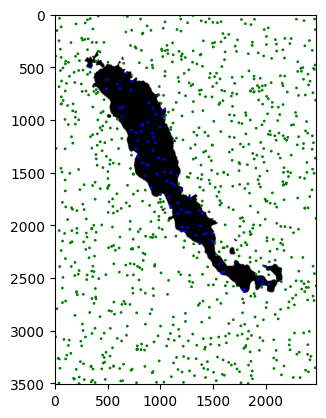

In [27]:
import matplotlib.pyplot as plt

x_tierra, y_tierra = list(zip(*puntos_tierra))
x_agua, y_agua = list(zip(*puntos_agua))

plt.imshow(img, interpolation='bilinear', cmap='gray')
plt.scatter(x_tierra, y_tierra, color='green', s = [1] * len(puntos_tierra))
plt.scatter(x_agua, y_agua, color='blue', s = [1] * len(puntos_agua))

 $$
  A_{\text{lago}} = A \times \text{prop}
  $$



In [10]:
area_lago = A * proporcion_agua
print(f"El area del lago son {area_lago} m cuadrados.")

El area del lago son 15909.090909090904 m cuadrados.


vamos a hacer ahora el mismo proceso con más puntos

In [30]:
n_puntos = 10_000_000

In [32]:
puntos_generados = []
puntos_agua = []
puntos_tierra = []
a_estimados = []

pixeles_agua = 0

for i in range(n_puntos):
    punto = get_random_point()
    puntos_generados.append(punto)
    pixel = img.getpixel(punto)
    
    if pixel < umbral: #caso tierra
        pixeles_agua += 1
        puntos_agua.append(punto)
    else:
        puntos_tierra.append(punto)
        
    proporcion_agua = pixeles_agua / (i + 1)
    a_estimada = A * proporcion_agua

    a_estimados.append(a_estimada)
    


print(f"El area del lago son {a_estimados[-1]} m cuadrados.")
print(proporcion_agua)
print(pixeles_agua)

El area del lago son 15771.229797979793 m cuadrados.
0.0892201
892201


Vamos a comprobar la valided del resultado haciendo los siguientes plots

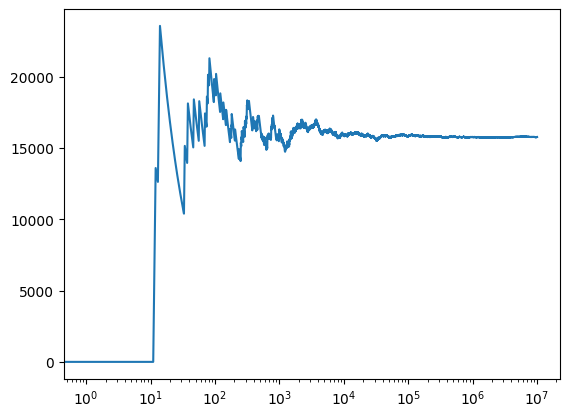

In [33]:
plt.plot(range(len(a_estimados)), a_estimados)
plt.xscale('log')

Como esperábamos a partir de 10 ^ 4 parece que la proporcián se estabiliza lo cual parece indicar un resultado fiable

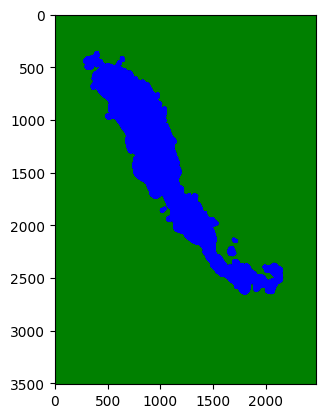

In [35]:
x_tierra, y_tierra = list(zip(*puntos_tierra))
x_agua, y_agua = list(zip(*puntos_agua))

plt.imshow(img, interpolation='bilinear', cmap='gray')
plt.scatter(x_tierra, y_tierra, color='green', s = [1] * len(puntos_tierra))
plt.scatter(x_agua, y_agua, color='blue', s = [1] * len(puntos_agua))

La imagen ha quedado completamente coloreada con los puntos lo cual de nuevo apoya la fiabilidad de la estimación.